# Initial Environment Setup

In [138]:
pip install scikit-learn==1.2.2

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.1
    Uninstalling scikit-learn-1.3.1:
      Successfully uninstalled scikit-learn-1.3.1
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\aadit\\AppData\\Roaming\\Python\\Python311\\site-packages\\~-learn\\.libs\\msvcp140.dll'
Check the permissions.



In [139]:
pip install --upgrade imbalanced-learn scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/f1/7d/2e562207176a5dcdad513085670674bb11ffaf37e1393eacb6d7fb502481/scikit_learn-1.3.1-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.3.1-cp311-cp311-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.1-cp311-cp311-win_amd64.whl (9.2 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
Note: you may need to restart the kernel to use updated packages.


In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

#to ignore and reduce warnings
import warnings
warnings.filterwarnings('ignore')

# Reading the Dataset

In [141]:
# Reading the csv data file.
tele_df = pd.read_csv("telecom_churn_data.csv")

In [142]:
# Displaying the first few set (10) field with all columns in the dataset
tele_df.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00
5,7000286308,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,50.258,...,0,NaN,NaN,NaN,NaN,1471,0.00,0.00,0.00,0.00
6,7001051193,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,429.023,...,0,NaN,NaN,NaN,NaN,1673,0.00,0.00,0.00,0.00
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,0,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.00
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,0,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.00
9,7001864400,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,119.518,...,0,NaN,1.0,NaN,NaN,902,0.00,0.00,0.00,0.00


In [143]:
# Checking the dimensions of the dataset
tele_df.shape

(99999, 226)

In [144]:
# Checking the informations regarding the dataset
tele_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [145]:
# Importing and displaying the Data Dictionary.
tele_df_dict = pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")
tele_df_dict

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mo..."
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


### Dropping Columns to Avoid Variance

In [146]:
# lets check the columns unique values and drop such columns with its value as 1
unique_1_col=[]
for i in tele_df.columns:
    if tele_df[i].nunique() == 1:
        unique_1_col.append(i)
    else:
        pass

tele_df.drop(unique_1_col, axis=1, inplace = True)
print("\n The following Columns are dropped from the dataset as their unique value is 1. (i.e.)It has no variance in the model\n",
      unique_1_col)


 The following Columns are dropped from the dataset as their unique value is 1. (i.e.)It has no variance in the model
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [147]:
# The curent dimensions of the dataset
tele_df.shape

(99999, 210)

In [148]:
# Number of missing values in the dataset
((tele_df.isnull().sum()/tele_df.shape[0])*100).round(2).sort_values(ascending=False)

max_rech_data_6     74.85
fb_user_6           74.85
count_rech_3g_6     74.85
count_rech_2g_6     74.85
night_pck_user_6    74.85
                    ...  
max_rech_amt_9       0.00
max_rech_amt_8       0.00
max_rech_amt_7       0.00
max_rech_amt_6       0.00
sep_vbc_3g           0.00
Length: 210, dtype: float64

### Converting Datetime Fields from object to Datetime Format for proper processing of data

In [149]:
# selecting all the columns with datetime format
date_col= tele_df.select_dtypes(include=['object'])
print("\nThese are the columns available with datetime format represented as object\n",date_col.columns)

# Converting the selected columns to datetime format
for i in date_col.columns:
    tele_df[i] = pd.to_datetime(tele_df[i])

# Current dimension of the dataset
tele_df.shape


These are the columns available with datetime format represented as object
 Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')


(99999, 210)

In [150]:
# confirming the conversion of dtype
tele_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 210 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](8), float64(168), int64(34)
memory usage: 160.2 MB


## Handling Missing Values

In [151]:
# Handling missing values with respect to `data recharge` attributes
tele_df[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6']].head(10)

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6
0,2014-06-21,1.0,252.0
1,NaT,NaN,NaN
2,NaT,NaN,NaN
3,NaT,NaN,NaN
4,2014-06-04,1.0,56.0
5,NaT,NaN,NaN
6,NaT,NaN,NaN
7,NaT,NaN,NaN
8,NaT,NaN,NaN
9,NaT,NaN,NaN


##### The data recharge can be considered a case of Meaningful Missing Data, therefore it may mean that recharges were not done during that period. Hence, Imputing the value of 0, wont affect the outcome.

In [152]:
# Code for conditional imputation
for i in range(len(tele_df)):
  # Handling 'total_rech_data', 'max_rech_data' and for month 6
    if pd.isnull((tele_df['total_rech_data_6'][i]) and (tele_df['max_rech_data_6'][i])):
        if pd.isnull(tele_df['date_of_last_rech_data_6'][i]):
            tele_df['total_rech_data_6'][i]=0
            tele_df['max_rech_data_6'][i]=0

  # Handling 'total_rech_data', 'max_rech_data' and for month 7
    if pd.isnull((tele_df['total_rech_data_7'][i]) and (tele_df['max_rech_data_7'][i])):
        if pd.isnull(tele_df['date_of_last_rech_data_7'][i]):
            tele_df['total_rech_data_7'][i]=0
            tele_df['max_rech_data_7'][i]=0

  # Handling 'total_rech_data', 'max_rech_data' and for month 8
    if pd.isnull((tele_df['total_rech_data_8'][i]) and (tele_df['max_rech_data_8'][i])):
        if pd.isnull(tele_df['date_of_last_rech_data_8'][i]):
            tele_df['total_rech_data_8'][i]=0
            tele_df['max_rech_data_8'][i]=0

  # Handling 'total_rech_data', 'max_rech_data' and for month 9
    if pd.isnull((tele_df['total_rech_data_9'][i]) and (tele_df['max_rech_data_9'][i])):
        if pd.isnull(tele_df['date_of_last_rech_data_9'][i]):
            tele_df['total_rech_data_9'][i]=0
            tele_df['max_rech_data_9'][i]=0

print("The columns \n'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9'\n'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9' are imputed with 0 based on the condition explained above")

The columns 
'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9'
'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9' are imputed with 0 based on the condition explained above


In [153]:
# Handling Missing Values of 'count_rech_2g_6','count_rech_3g_6','total_rech_data_6'
# Checking the related columns values
tele_df[['count_rech_2g_6','count_rech_3g_6','total_rech_data_6']].head(10)

,count_rech_2g_6,count_rech_3g_6,total_rech_data_6
0,0.0,1.0,1.0
1,NaN,NaN,0.0
2,NaN,NaN,0.0
3,NaN,NaN,0.0
4,1.0,0.0,1.0
5,NaN,NaN,0.0
6,NaN,NaN,0.0
7,NaN,NaN,0.0
8,NaN,NaN,0.0
9,NaN,NaN,0.0


##### As the values of  'total_rech_data_6' = count_rech_2g_6' + 'count_rech_3g_6', the columns can be seen as a result of direct correlation which will result into Multicollinearity and Overfitting leading to incorrect data prediction.

In [154]:
# Dropping the columns 'count_rech_2g_*' & 'count_rech_3g_*' for the months 6,7,8 and 9 
tele_df.drop(['count_rech_2g_6','count_rech_3g_6',
                   'count_rech_2g_7','count_rech_3g_7',
                   'count_rech_2g_8','count_rech_3g_8',
                   'count_rech_2g_9','count_rech_3g_9'],axis=1, inplace=True)

print("The 'count_rech_2g_6','count_rech_3g_6','count_rech_2g_7','count_rech_3g_7','count_rech_2g_8','count_rech_3g_8','count_rech_2g_9','count_rech_3g_9' columns are dropped as they can be explained from the 'total_rech_data'column")

The 'count_rech_2g_6','count_rech_3g_6','count_rech_2g_7','count_rech_3g_7','count_rech_2g_8','count_rech_3g_8','count_rech_2g_9','count_rech_3g_9' columns are dropped as they can be explained from the 'total_rech_data'column


In [155]:
# The curent dimensions of the dataset
tele_df.shape

(99999, 202)

### Handling the missing values for the attributes 'arpu_3g_6','arpu_2g_6' and 'av_rech_amt_data_6' and deriving Correlation to assess the impact of dataset in prediction of Customer Churn.

In [156]:
# Checking the related columns values
tele_df[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].head(10)

,arpu_3g_6,arpu_2g_6,av_rech_amt_data_6
0,212.17,212.17,252.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,0.00,0.00,56.0
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [157]:
# Checking the correlation between the above mentioned columns in tabular for months 6,7,8 and 9
print("Correlation table for month 6\n\n", tele_df[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].corr())
print("\nCorrelation table for month 7\n\n", tele_df[['arpu_3g_7','arpu_2g_7','av_rech_amt_data_7']].corr())
print("\nCorrelation table for month 8\n\n", tele_df[['arpu_3g_8','arpu_2g_8','av_rech_amt_data_8']].corr())
print("\nCorrelation table for month 9\n\n", tele_df[['arpu_3g_9','arpu_2g_9','av_rech_amt_data_9']].corr())

Correlation table for month 6

                     arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
arpu_3g_6            1.000000   0.932232            0.809695
arpu_2g_6            0.932232   1.000000            0.834065
av_rech_amt_data_6   0.809695   0.834065            1.000000

Correlation table for month 7

                     arpu_3g_7  arpu_2g_7  av_rech_amt_data_7
arpu_3g_7            1.000000   0.930366            0.796131
arpu_2g_7            0.930366   1.000000            0.815933
av_rech_amt_data_7   0.796131   0.815933            1.000000

Correlation table for month 8

                     arpu_3g_8  arpu_2g_8  av_rech_amt_data_8
arpu_3g_8            1.000000   0.924925            0.787165
arpu_2g_8            0.924925   1.000000            0.805482
av_rech_amt_data_8   0.787165   0.805482            1.000000

Correlation table for month 9

                     arpu_3g_9  arpu_2g_9  av_rech_amt_data_9
arpu_3g_9            1.000000   0.852253            0.722932
arpu_2g_9      

In [158]:
# Dropping the columns 'arpu_3g_*'&'arpu_2g_*' in month 6,7,8 and 9 datafrom the dataset
tele_df.drop(['arpu_3g_6','arpu_2g_6',
                  'arpu_3g_7','arpu_2g_7',
                  'arpu_3g_8','arpu_2g_8',
                  'arpu_3g_9','arpu_2g_9'],axis=1, inplace=True)
print("\nThe columns'arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8','arpu_3g_9','arpu_2g_9' are dropped from the dataset due to high corellation between their respective arpu_* variable in the dataset\n")


The columns'arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8','arpu_3g_9','arpu_2g_9' are dropped from the dataset due to high corellation between their respective arpu_* variable in the dataset



In [159]:
# The curent dimensions of the dataset
tele_df.shape

(99999, 194)

### Handling the other attributes with Higher Missing Value Percentage

In [160]:
tele_df.drop(['fb_user_6','fb_user_7','fb_user_8','fb_user_9',
                  'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9'],
                  axis=1, inplace=True)
print("\nThe columns 'fb_user_6','fb_user_7','fb_user_8','fb_user_9','night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9' are dropped from the dataset as it has no meaning to the data and has high missing values above 50%\n")


The columns 'fb_user_6','fb_user_7','fb_user_8','fb_user_9','night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9' are dropped from the dataset as it has no meaning to the data and has high missing values above 50%



In [161]:
# The curent dimensions of the dataset
tele_df.shape

(99999, 186)

### Handling the Missing Values for the attributes av_rech_amt_data_* for month 6 to 9

In [162]:
# Checking the related columns values
tele_df[['av_rech_amt_data_7','max_rech_data_7','total_rech_data_7']].head(10)

,av_rech_amt_data_7,max_rech_data_7,total_rech_data_7
0,252.0,252.0,1.0
1,154.0,154.0,1.0
2,NaN,0.0,0.0
3,NaN,0.0,0.0
4,NaN,0.0,0.0
5,NaN,0.0,0.0
6,NaN,0.0,0.0
7,NaN,0.0,0.0
8,177.0,154.0,2.0
9,154.0,154.0,1.0


In [163]:
# Code for conditional imputation
for i in range(len(tele_df)):
  # Handling `av_rech_amt_data`  for month 6
    if (pd.isnull(tele_df['av_rech_amt_data_6'][i]) and (tele_df['total_rech_data_6'][i]==0)):
        tele_df['av_rech_amt_data_6'][i] = 0

  # Handling `av_rech_amt_data`  for month 7
    if (pd.isnull(tele_df['av_rech_amt_data_7'][i]) and (tele_df['total_rech_data_7'][i]==0)):
        tele_df['av_rech_amt_data_7'][i] = 0

  # Handling `av_rech_amt_data`  for month 8
    if (pd.isnull(tele_df['av_rech_amt_data_8'][i]) and (tele_df['total_rech_data_8'][i]==0)):
        tele_df['av_rech_amt_data_8'][i] = 0

  # Handling `av_rech_amt_data`  for month 9
    if (pd.isnull(tele_df['av_rech_amt_data_9'][i]) and (tele_df['total_rech_data_9'][i]==0)):
        tele_df['av_rech_amt_data_9'][i] = 0


print("\nThe columns 'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8' and 'av_rech_amt_data_9' are imputed with 0 based on the condition explained above\n")


The columns 'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8' and 'av_rech_amt_data_9' are imputed with 0 based on the condition explained above



In [164]:
# Checking the overall missing values in the dataset
((tele_df.isnull().sum()/tele_df.shape[0])*100).round(2).sort_values(ascending=False)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
og_others_9                  7.75
                            ...  
max_rech_amt_7               0.00
max_rech_amt_6               0.00
total_rech_amt_9             0.00
total_rech_amt_8             0.00
sep_vbc_3g                   0.00
Length: 186, dtype: float64

In [165]:
tele_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 186 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](8), float64(144), int64(34)
memory usage: 141.9 MB


In [166]:
# Dropping the columns related to datetime dtype from the dataset
tele_df.drop(["date_of_last_rech_data_6","date_of_last_rech_data_7",
                   "date_of_last_rech_data_8","date_of_last_rech_data_9"], axis=1, inplace=True)
print("\nThe columns 'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9' are dropped as it has no significance to the data\n")


The columns 'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9' are dropped as it has no significance to the data



In [167]:
# Dropping the columns related to datetime dtype from the dataset
tele_df.drop(["date_of_last_rech_6","date_of_last_rech_7",
                   "date_of_last_rech_8","date_of_last_rech_9"], axis=1, inplace=True)
print("\nThe columns 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9' are dropped as it has no significance to the data\n")


The columns 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9' are dropped as it has no significance to the data



In [168]:
# The curent dimensions of the dataset
tele_df.shape

(99999, 178)

### Separating the High Value Customer from Good Phase

In [169]:
# Filtering the data 
 # We are filtering the data in accordance to total revenue generated per customer.

 # first we need the total amount recharge amount done for data alone, we have average rechage amount done. 

 # Calculating the total recharge amount done for data alone in months 6,7,8 and 9
tele_df['total_rech_amt_data_6']=tele_df['av_rech_amt_data_6'] * tele_df['total_rech_data_6']
tele_df['total_rech_amt_data_7']=tele_df['av_rech_amt_data_7'] * tele_df['total_rech_data_7']

# Calculating the overall recharge amount for the months 6,7,8 and 9
tele_df['overall_rech_amt_6'] = tele_df['total_rech_amt_data_6'] + tele_df['total_rech_amt_6']
tele_df['overall_rech_amt_7'] = tele_df['total_rech_amt_data_7'] + tele_df['total_rech_amt_7']

# Calculating the average recharge done by customer in months June and July(i.e. 6th and 7th month)
tele_df['avg_rech_amt_6_7'] = (tele_df['overall_rech_amt_6'] + tele_df['overall_rech_amt_7'])/2

# Finding the value of 70th percentage in the overall revenues defining the high value customer creteria for the company
cut_off = tele_df['avg_rech_amt_6_7'].quantile(0.70)
print("\nThe 70th quantile value to determine the High Value Customer is: ",cut_off,"\n")

# Filtering the data to the top 30% considered as High Value Customer
tele_df = tele_df[tele_df['avg_rech_amt_6_7'] >= cut_off]


The 70th quantile value to determine the High Value Customer is:  478.0 



In [170]:
# The curent dimension of the dataset
tele_df.shape

(30001, 183)

#### As stated in the Problem Statement we have Refined and created a Data Set of around '30 Thousand Customers' who fall under the High Value Customer Criteria.

In [171]:
# Missing Value Percentage in thenewly created High Value Customer DataFrame
((tele_df.isnull().sum()/tele_df.shape[0])*100).round(2).sort_values(ascending=False)

loc_ic_t2f_mou_9    6.34
spl_og_mou_9        6.34
loc_og_t2m_mou_9    6.34
loc_og_t2f_mou_9    6.34
loc_ic_t2t_mou_9    6.34
                    ... 
max_rech_amt_8      0.00
max_rech_amt_7      0.00
max_rech_amt_6      0.00
total_rech_amt_9    0.00
avg_rech_amt_6_7    0.00
Length: 183, dtype: float64

In [172]:
# Numerical columns available
column_num = tele_df.select_dtypes(include = ['int64','float64']).columns.tolist()

 We will use K-Nearest Neighbors Imputer (KNNImputer) to impute the other missing values so as to:
 
1. **Preservation of Data Relationships:** 
2. **Adapt to Data Distribution:** 
3. **Multivariate Imputation:**
4. **Flexibility in Choosing Neighbors:** 

In [173]:
# Importing the libraries for Scaling and Imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# Calling the Scaling function
scalar = MinMaxScaler()

# Scaling and transforming the data for the columns that are numerical
tele_df[column_num]=scalar.fit_transform(tele_df[column_num])

# Calling the KNN Imputer function
knn=KNNImputer(n_neighbors=3)

# Imputing the NaN values using KNN Imputer
tele_df_knn = pd.DataFrame(knn.fit_transform(tele_df[column_num]))
tele_df_knn.columns=tele_df[column_num].columns


In [174]:
# check for any null values after imputation for numerical columns
tele_df_knn.isnull().sum().sum()

0

In [175]:
# Restoring the scaled values to its original form as we have scaled the numerical columns for the purpose of handling the null values. 

# Converting the scaled data back to the original data
tele_df[column_num]=scalar.inverse_transform(tele_df_knn)

# Checking the top 10 data
tele_df.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7
0,7.000843e+09,197.385,214.816,213.803,21.100,53.27,24.613333,0.00,33.590000,84.23,...,968.0,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0
7,7.000702e+09,1069.180,1349.850,3171.480,500.000,57.84,54.680000,52.29,65.276667,453.43,...,802.0,57.74,19.38,18.74,0.00,0.0,0.0,1580.0,790.0,1185.0
8,7.001525e+09,378.721,492.223,137.362,166.787,413.69,351.030000,35.08,33.460000,94.66,...,315.0,21.03,910.65,122.16,0.00,0.0,354.0,437.0,955.0,696.0
21,7.002124e+09,514.453,597.753,637.760,578.596,102.41,132.110000,85.14,161.630000,757.93,...,720.0,0.00,0.00,0.00,0.00,0.0,0.0,600.0,680.0,640.0
23,7.000887e+09,74.350,193.897,366.966,811.480,48.96,50.660000,33.58,15.740000,85.41,...,604.0,40.45,51.86,0.00,0.00,0.0,712.0,0.0,1166.0,583.0
33,7.000150e+09,977.020,2362.833,409.230,799.356,0.00,0.000000,0.00,0.000000,0.00,...,1328.0,358.10,2706.83,1714.67,0.00,5285.0,20424.0,6343.0,23230.0,14786.5
38,7.000815e+09,363.987,486.558,393.909,391.709,248.99,619.960000,666.38,494.790000,88.86,...,1155.0,0.00,0.00,0.00,0.00,0.0,0.0,420.0,636.0,528.0
41,7.000721e+09,482.832,425.764,229.769,143.596,86.39,118.880000,80.44,40.060000,232.36,...,2010.0,0.00,0.00,0.00,0.00,0.0,0.0,496.0,510.0,503.0
48,7.000294e+09,1873.271,575.927,179.218,1189.744,2061.69,881.430000,156.91,1589.230000,1087.76,...,1265.0,0.00,0.00,0.00,0.00,0.0,0.0,2317.0,580.0,1448.5
53,7.002189e+09,978.077,1141.296,706.020,1076.247,135.14,119.590000,102.69,99.830000,479.31,...,697.0,0.00,0.00,0.00,0.00,344.0,575.0,1503.0,1947.0,1725.0


In [176]:
# Checking the overall missing values in the dataset
((tele_df.isnull().sum()/tele_df.shape[0])*100).round(2).sort_values(ascending=False)

mobile_number       0.0
isd_ic_mou_8        0.0
ic_others_6         0.0
ic_others_7         0.0
ic_others_8         0.0
                   ... 
spl_og_mou_8        0.0
spl_og_mou_9        0.0
og_others_6         0.0
og_others_7         0.0
avg_rech_amt_6_7    0.0
Length: 183, dtype: float64

In [177]:
# Checking the presence of anymore missing values
tele_df.isnull().sum().sum()

0

#### Defining Churn Variable as mentioned in the Business Objective:
 1. **total_ic_mou_9**
 2. **total_og_mou_9**
 3. **vol_2g_mb_9**
 4. **vol_3g_mb_9**

In [178]:
# Selecting the columns to define churn variable (i.e. TARGET Variable)
churned_column=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
tele_df[churned_column].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  30001 non-null  float64
 1   total_og_mou_9  30001 non-null  float64
 2   vol_2g_mb_9     30001 non-null  float64
 3   vol_3g_mb_9     30001 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB


In [179]:
# Initializing the churn variable.
tele_df['churn']=0

# Imputing the churn values based on the condition
tele_df['churn'] = np.where(tele_df[churned_column].sum(axis=1) == 0, 1, 0)

In [180]:
# Checking the top 10 data
tele_df.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn
0,7.000843e+09,197.385,214.816,213.803,21.100,53.27,24.613333,0.00,33.590000,84.23,...,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0,1
7,7.000702e+09,1069.180,1349.850,3171.480,500.000,57.84,54.680000,52.29,65.276667,453.43,...,57.74,19.38,18.74,0.00,0.0,0.0,1580.0,790.0,1185.0,1
8,7.001525e+09,378.721,492.223,137.362,166.787,413.69,351.030000,35.08,33.460000,94.66,...,21.03,910.65,122.16,0.00,0.0,354.0,437.0,955.0,696.0,0
21,7.002124e+09,514.453,597.753,637.760,578.596,102.41,132.110000,85.14,161.630000,757.93,...,0.00,0.00,0.00,0.00,0.0,0.0,600.0,680.0,640.0,0
23,7.000887e+09,74.350,193.897,366.966,811.480,48.96,50.660000,33.58,15.740000,85.41,...,40.45,51.86,0.00,0.00,0.0,712.0,0.0,1166.0,583.0,0
33,7.000150e+09,977.020,2362.833,409.230,799.356,0.00,0.000000,0.00,0.000000,0.00,...,358.10,2706.83,1714.67,0.00,5285.0,20424.0,6343.0,23230.0,14786.5,0
38,7.000815e+09,363.987,486.558,393.909,391.709,248.99,619.960000,666.38,494.790000,88.86,...,0.00,0.00,0.00,0.00,0.0,0.0,420.0,636.0,528.0,0
41,7.000721e+09,482.832,425.764,229.769,143.596,86.39,118.880000,80.44,40.060000,232.36,...,0.00,0.00,0.00,0.00,0.0,0.0,496.0,510.0,503.0,0
48,7.000294e+09,1873.271,575.927,179.218,1189.744,2061.69,881.430000,156.91,1589.230000,1087.76,...,0.00,0.00,0.00,0.00,0.0,0.0,2317.0,580.0,1448.5,0
53,7.002189e+09,978.077,1141.296,706.020,1076.247,135.14,119.590000,102.69,99.830000,479.31,...,0.00,0.00,0.00,0.00,344.0,575.0,1503.0,1947.0,1725.0,0


0    91.863605
1     8.136395
Name: churn, dtype: float64


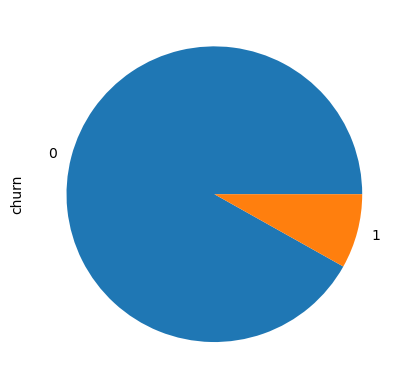

In [181]:
# lets find out churn/non churn percentage
print((tele_df['churn'].value_counts()/len(tele_df))*100)
((tele_df['churn'].value_counts()/len(tele_df))*100).plot(kind="pie")
plt.show()

#### As can be observed from the above pie chart and results obtained that around 92% of the **Cutomers Do Not** churn, which might mean that there might be a class imbalance.

#### We can Treat Class Imbalance by Either Dropping the Columns or Using SMOTE technique to treat Class Imbalance.

###### As churn is the target variable, columns associated to it(i.e. all columns with suffix _9) can be dropped from the dataset.

In [182]:
# Churn phase columns to be dropped

churn_phase_cols = [col for col in tele_df.columns if '_9' in col]
print("The columns from churn phase are:\n",churn_phase_cols)

The columns from churn phase are:
 ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [183]:
# Dropping the selected churn columns
tele_df.drop(churn_phase_cols, axis=1, inplace=True)

# The curent dimension of the dataset after dropping the churn related columns
tele_df.shape

(30001, 141)

In [184]:
tele_df.drop(['total_rech_amt_data_6','av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'total_rech_amt_data_7','av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

In [185]:
# creating a list of column names for each month
mon_6_cols = [col for col in tele_df.columns if '_6' in col]
mon_7_cols = [col for col in tele_df.columns if '_7' in col]
mon_8_cols = [col for col in tele_df.columns if '_8' in col]

###### Checking Correlation to Check the resence of Collinearity and treat Overfitting and Incorrect data presence to achieve better predictions.

In [186]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones
tele_df_corr = tele_df.corr()
tele_df_corr.loc[:,:] = np.tril(tele_df_corr, k=-1)
tele_df_corr = tele_df_corr.stack()
tele_df_corr
tele_df_corr[(tele_df_corr > 0.80) | (tele_df_corr < -0.80)].sort_values(ascending=False)

total_rech_amt_8    arpu_8                0.955351
isd_og_mou_8        isd_og_mou_7          0.943433
                    isd_og_mou_6          0.919641
isd_og_mou_7        isd_og_mou_6          0.916237
sachet_2g_8         total_rech_data_8     0.900629
total_ic_mou_6      loc_ic_mou_6          0.895099
total_ic_mou_8      loc_ic_mou_8          0.893072
total_ic_mou_7      loc_ic_mou_7          0.883070
std_og_t2t_mou_8    onnet_mou_8           0.860483
std_og_t2t_mou_7    onnet_mou_7           0.860275
std_og_t2t_mou_6    onnet_mou_6           0.859593
avg_rech_amt_6_7    overall_rech_amt_7    0.856275
std_og_t2m_mou_7    offnet_mou_7          0.854685
std_og_t2m_mou_8    offnet_mou_8          0.851049
total_og_mou_8      std_og_mou_8          0.848858
total_og_mou_7      std_og_mou_7          0.848825
loc_ic_mou_8        loc_ic_t2m_mou_8      0.847512
std_ic_mou_8        std_ic_t2m_mou_8      0.845590
loc_ic_mou_6        loc_ic_t2m_mou_6      0.844418
loc_og_mou_8        loc_og_mou_

In [187]:
col_to_drop=['total_rech_amt_8','isd_og_mou_8','isd_og_mou_7','sachet_2g_8','total_ic_mou_6',
            'total_ic_mou_8','total_ic_mou_7','std_og_t2t_mou_6','std_og_t2t_mou_8','std_og_t2t_mou_7',
            'std_og_t2m_mou_7','std_og_t2m_mou_8',]

# These columns can be dropped as they are highly collinered with other predictor variables.
# criteria set is for collinearity of 85%

#  dropping these column
tele_df.drop(col_to_drop, axis=1, inplace=True)

In [188]:
# The curent dimension of the dataset after dropping few unwanted columns
tele_df.shape

(30001, 121)

#### Creating New Attributes to better pocess and predict Customer Churn

In [189]:
# The 'aon' column gives the Ages of Customer on the network,
# which shows how long the customer has been using the given network and 
# can be used for deriving important information related to customer churn.


# creating a new variable 'tenure'
tele_df['tenure'] = (tele_df['aon']/30).round(0)

# Dropping 'aon' as a new column has been derived
tele_df.drop('aon',axis=1, inplace=True)

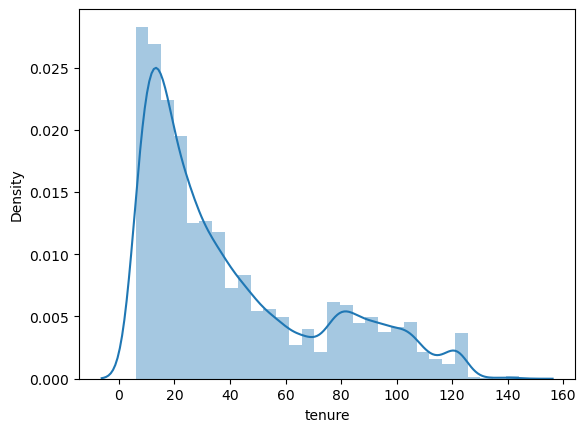

In [190]:
# Checking the distribution of the tenure variable

sns.distplot(tele_df['tenure'],bins=30)
plt.show()

In [191]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
tele_df['tenure_range'] = pd.cut(tele_df['tenure'], tn_range, labels=tn_label)
tele_df['tenure_range'].head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

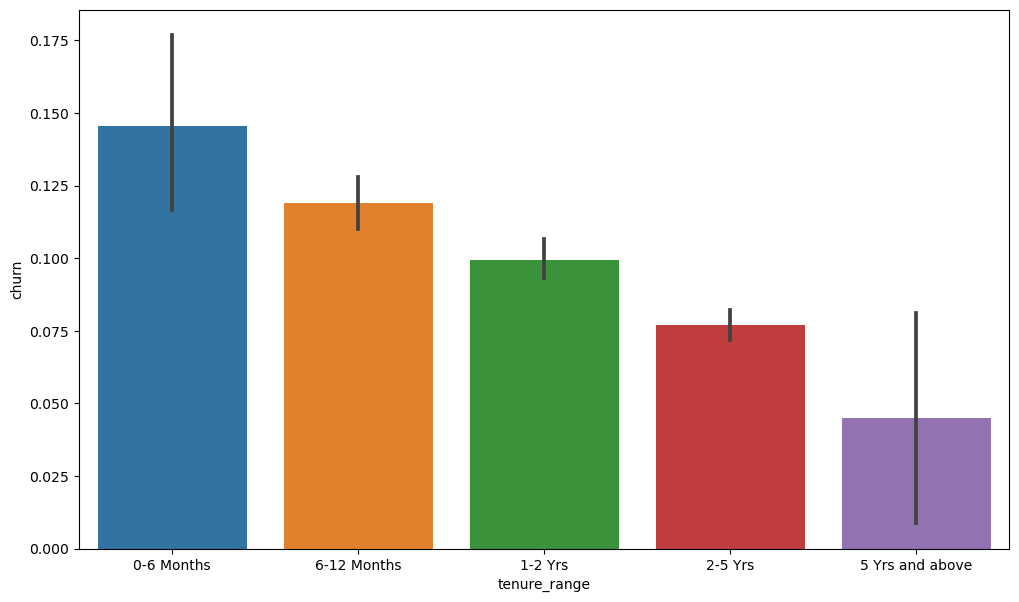

In [192]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn', data=tele_df)
plt.show()

##### From the above Bar Graph we can determine that:
 1. **The Highest Customer Churn is between 0 to 6 months**
 2. **The Lowest Customer Churn if for the period 5 years and above**
 3. **The Customer Churn slowly decreases as the time period for which they have been a customer of the Network**

In [193]:
tele_df["avg_arpu_6_7"]= (tele_df['arpu_6']+tele_df['arpu_7'])/2
tele_df['avg_arpu_6_7'].head()

0      206.1005
7     1209.5150
8      435.4720
21     556.1030
23     134.1235
Name: avg_arpu_6_7, dtype: float64

In [194]:
tele_df.drop(['arpu_6','arpu_7'], axis=1, inplace=True)


# The curent dimension of the dataset after dropping few unwanted columns
tele_df.shape

(30001, 121)

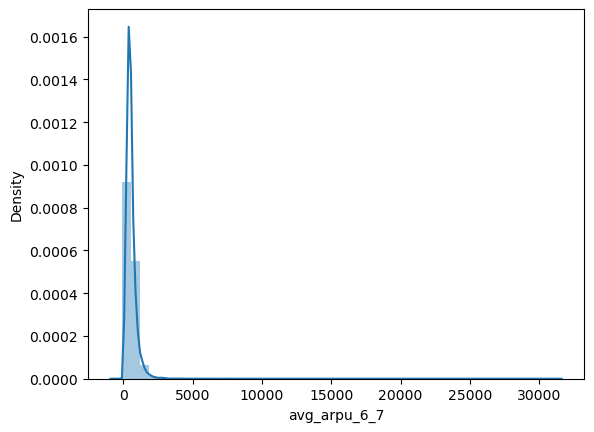

In [195]:
# Plotting for Visualization
sns.distplot(tele_df['avg_arpu_6_7'])
plt.show()

Text(0.5, 1.0, 'Mapping Features with Churn variable')

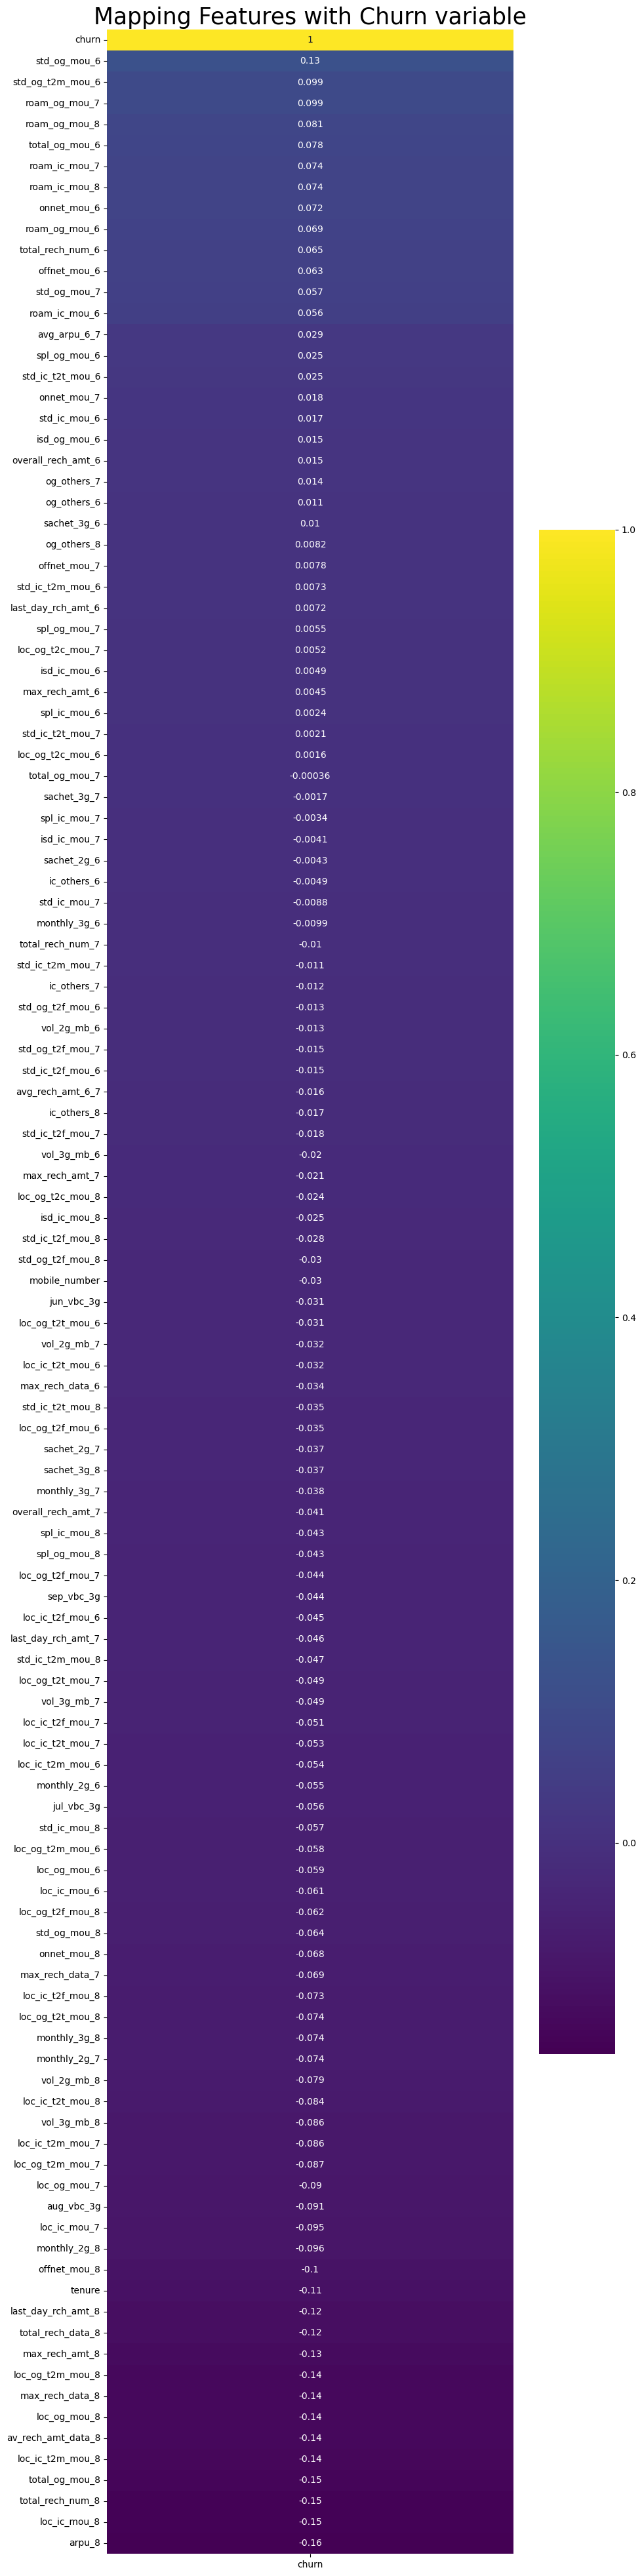

In [196]:
# Checking Correlation between target variable(SalePrice) with the other variable in the dataset
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(tele_df.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True, 
                                cmap='viridis')
heatmap_churn.set_title("Mapping Features with Churn variable", fontsize=25)

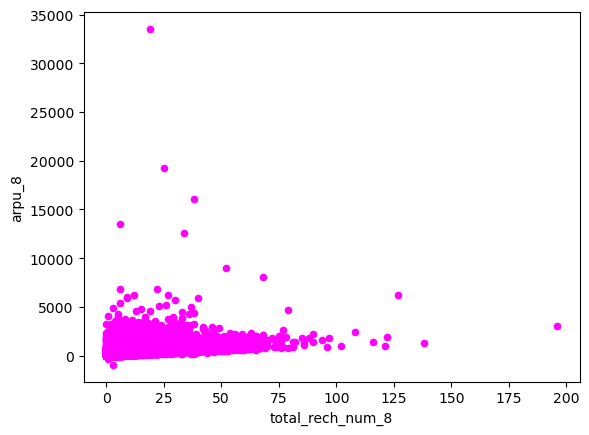

In [197]:
# Scatter plot between total recharge and avg revenue for the 8th month
tele_df[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8', y='arpu_8', c='magenta')
plt.show()

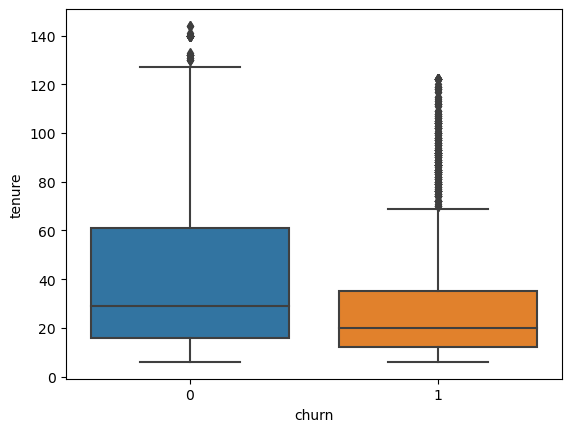

In [198]:
sns.boxplot(x = tele_df.churn, y = tele_df.tenure)

plt.show()

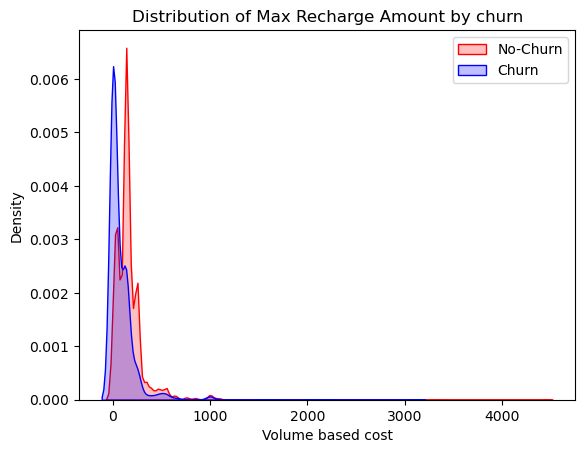

In [199]:
# PLOT CHURN vs MAX RECHARGE AMT
ax = sns.kdeplot(tele_df.max_rech_amt_8[(tele_df["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(tele_df.max_rech_amt_8[(tele_df["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='best')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')
plt.show()

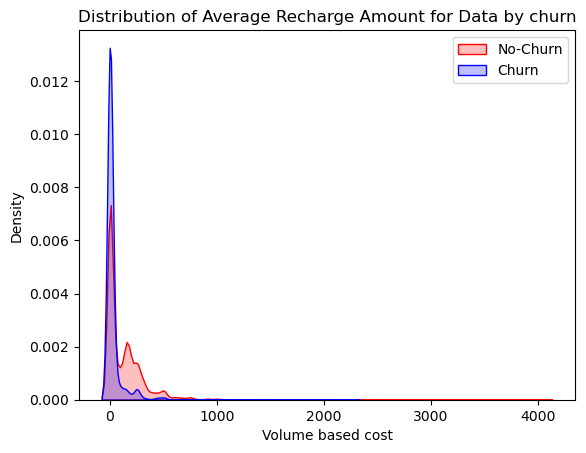

In [200]:
# CHURN VS MAX RECHARGE AMT
ax = sns.kdeplot(tele_df.av_rech_amt_data_8[(tele_df["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(tele_df.av_rech_amt_data_8[(tele_df["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='best')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Average Recharge Amount for Data by churn')
plt.show()

In [201]:
# Creating categories for month 8 column totalrecharge and their count
tele_df['total_rech_data_group_8']=pd.cut(tele_df['total_rech_data_8'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
tele_df['total_rech_num_group_8']=pd.cut(tele_df['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

					Distribution of total_rech_data_8 variable
 <=10_Recharges     15307
No_Recharge        14048
10-25_Recharges      608
>25_Recharges         38
Name: total_rech_data_group_8, dtype: int64


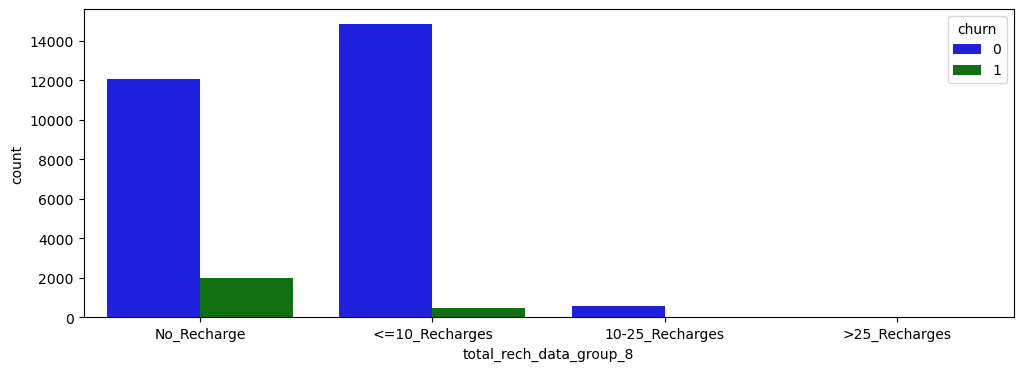

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors
custom_palette = ['blue', 'green', 'red', 'purple']  # Add your desired colors here

# Plotting the first countplot with custom colors
plt.figure(figsize=[12, 4])
sns.countplot(data=tele_df, x="total_rech_data_group_8", hue="churn", palette=custom_palette)
print("\t\t\t\t\tDistribution of total_rech_data_8 variable\n", tele_df['total_rech_data_group_8'].value_counts())
plt.show()

In [203]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(tele_df[['total_rech_data_group_8','total_rech_num_group_8','tenure_range']], drop_first=True)
dummy.head()

,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,1,0,0,1,0,0,0,0,1,0
7,0,0,0,1,0,0,0,0,1,0
8,1,0,0,0,1,0,1,0,0,0
21,0,0,0,0,0,1,0,1,0,0
23,1,0,0,1,0,0,0,1,0,0


In [204]:
# Adding the results to the master dataframe
tele_df = pd.concat([tele_df, dummy], axis=1)
tele_df.head()

,mobile_number,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,7.000843e+09,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,...,1,0,0,1,0,0,0,0,1,0
7,7.000702e+09,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,...,0,0,0,1,0,0,0,0,1,0
8,7.001525e+09,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,0.00,0.00,...,1,0,0,0,1,0,1,0,0,0
21,7.002124e+09,637.760,102.41,132.110000,85.14,757.93,896.680000,983.39,0.00,0.00,...,0,0,0,0,0,1,0,1,0,0
23,7.000887e+09,366.966,48.96,50.660000,33.58,85.41,89.360000,205.89,0.00,0.00,...,1,0,0,1,0,0,0,1,0,0


In [205]:
# Creating a copy of the filtered dataframe

df=tele_df[:].copy()

# Dropping un-neccessary columns
df.drop(['tenure_range','mobile_number','total_rech_data_group_8','total_rech_num_group_8','sep_vbc_3g','tenure'], axis=1, inplace=True)

In [206]:
# Cheking the dataset
df.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,0.00,...,1,0,0,1,0,0,0,0,1,0
7,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,31.64,...,0,0,0,1,0,0,0,0,1,0
8,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,0.00,0.00,0.00,...,1,0,0,0,1,0,1,0,0,0
21,637.760,102.41,132.110000,85.14,757.93,896.680000,983.39,0.00,0.00,0.00,...,0,0,0,0,0,1,0,1,0,0
23,366.966,48.96,50.660000,33.58,85.41,89.360000,205.89,0.00,0.00,0.00,...,1,0,0,1,0,0,0,1,0,0


In [207]:
# lets create X dataset for model building.
X = df.drop(['churn'],axis=1)

In [208]:
X.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,0.00,...,1,0,0,1,0,0,0,0,1,0
7,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,31.64,...,0,0,0,1,0,0,0,0,1,0
8,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,0.00,0.00,0.00,...,1,0,0,0,1,0,1,0,0,0
21,637.760,102.41,132.110000,85.14,757.93,896.680000,983.39,0.00,0.00,0.00,...,0,0,0,0,0,1,0,1,0,0
23,366.966,48.96,50.660000,33.58,85.41,89.360000,205.89,0.00,0.00,0.00,...,1,0,0,1,0,0,0,1,0,0


In [209]:
# lets create y dataset for model building.
y=df['churn']
y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32

In [210]:
# split the dateset into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (21000, 126)
Dimension of X_test: (9001, 126)


In [211]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 15709 to 99093
Columns: 126 entries, arpu_8 to tenure_range_5 Yrs and above
dtypes: float64(116), uint8(10)
memory usage: 18.9 MB


In [212]:
column_num = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [213]:
# Scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[column_num] = scaler.fit_transform(X_train[column_num])

In [214]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
15709,0.038904,0.000235,0.000531,0.000238,0.004211,0.003651,0.004095,0.0,0.000000,0.0,...,1,0,0,1,0,0,0,0,0,0
28202,0.032921,0.000493,0.000000,0.000000,0.001631,0.000000,0.000000,0.0,0.000000,0.0,...,1,0,0,1,0,0,0,0,1,0
14943,0.033826,0.000876,0.000275,0.000714,0.003861,0.007485,0.003679,0.0,0.000000,0.0,...,1,0,0,0,1,0,1,0,0,0
92007,0.081645,0.163879,0.105394,0.050406,0.142667,0.177782,0.052962,0.0,0.029033,0.0,...,1,0,0,1,0,0,0,0,1,0
56403,0.042893,0.079633,0.051881,0.004868,0.058346,0.046732,0.010097,0.0,0.000000,0.0,...,0,0,0,0,1,0,0,1,0,0


### Data Imbalance Handling


##### Using SMOTE Method (Synthetic Minority Over-sampling Technique), to Handle DATA IMBALANCE of the Dataset Class Imabalance to treat biased in models.

In [215]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [216]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (38576, 126)
Dimension of y_train_sm Shape: (38576,)


### Using LOGISTIC REGRESSION

In [217]:
import statsmodels.api as sm

# Create a logistic regression model
X_train_sm = sm.add_constant(X_train_sm)  # Add a constant term (intercept) to the features
logregmodel = sm.GLM(y_train_sm, X_train_sm, family=sm.families.Binomial())
result = logregmodel.fit()

# Get the summary of the logistic regression model
print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38450
Model Family:                Binomial   Df Model:                          125
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13899.
Date:                Sun, 08 Oct 2023   Deviance:                       27799.
Time:                        10:01:16   Pearson chi2:                 2.47e+14
No. Iterations:                   100   Pseudo R-squ. (CS):             0.4861
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

#### LOGISTIC REGRESSION (FEATURE SELECTION USING RFE)

In [218]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# Running RFE with 20 variables as output
rfe = RFE(estimator=logreg, n_features_to_select=20)
rfe = rfe.fit(X_train_sm, y_train_sm)


In [219]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['arpu_8', 'roam_ic_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'std_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_8', 'std_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'total_rech_data_8', 'av_rech_amt_data_8', 'vol_2g_mb_8',
       'monthly_2g_8', 'aug_vbc_3g', 'avg_arpu_6_7'],
      dtype='object')


In [220]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('const', False, 70),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 22),
 ('onnet_mou_7', False, 37),
 ('onnet_mou_8', False, 42),
 ('offnet_mou_6', False, 35),
 ('offnet_mou_7', False, 21),
 ('offnet_mou_8', False, 26),
 ('roam_ic_mou_6', False, 13),
 ('roam_ic_mou_7', True, 1),
 ('roam_ic_mou_8', False, 59),
 ('roam_og_mou_6', False, 69),
 ('roam_og_mou_7', False, 33),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 73),
 ('loc_og_t2t_mou_7', False, 92),
 ('loc_og_t2t_mou_8', False, 19),
 ('loc_og_t2m_mou_6', False, 78),
 ('loc_og_t2m_mou_7', False, 68),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 105),
 ('loc_og_t2f_mou_7', False, 5),
 ('loc_og_t2f_mou_8', False, 25),
 ('loc_og_t2c_mou_6', False, 7),
 ('loc_og_t2c_mou_7', False, 65),
 ('loc_og_t2c_mou_8', False, 106),
 ('loc_og_mou_6', False, 48),
 ('loc_og_mou_7', False, 108),
 ('loc_og_mou_8', False, 2),
 ('std_og_t2m_mou_6', False, 102),
 ('std_og_t2f_mou_6', False, 77),
 ('std_og_t2f_mou_7', False, 27

In [221]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38555
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15852.
Date:                Sun, 08 Oct 2023   Deviance:                       31703.
Time:                        10:02:47   Pearson chi2:                 8.44e+10
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4313
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5718      0.071      8.101      0.000       0.433       0.710
arpu_8                -7.4189      1.295     -5.730      0.000      -9.957      -4.881
roam_ic_mou_7          8.3147      0.929      8.948      0.000       6.493      10.136
roam_og_mou_8          4.3254      0.602      7.190      0.000       3.146       5.505
loc_og_t2m_mou_8      -3.8292      0.668     -5.731      0.000      -5.139      -2.520
std_og_mou_7           7.7463      0.513     15.114      0.000       6.742       8.751
total_og_mou_8       -20.2090      0.956    -21.143      0.000     -22.082     -18.336
loc_ic_t2t_mou_8       1.0280      4.078      0.252      0.801      -6.966       9.022
loc_ic_t2m_mou_8      -1.2611      4.448     -0.284      0.777      -9.978       7.456
loc_ic_mou_6           9.1611      0.723     12.666      0.000       7.743      10.579
loc_ic_mou_8         -31.0473      5.010     -6.197      0.000     -40.866     -21.228
std_ic_mou_8         -11.9357      1.359     -8.784      0.000     -14.599      -9.272
spl_ic_mou_8         -19.8516      1.375    -14.436      0.000     -22.547     -17.156
total_rech_num_8      -7.0996      0.533    -13.327      0.000      -8.144      -6.055
last_day_rch_amt_8   -18.3227      0.810    -22.610      0.000     -19.911     -16.734
total_rech_data_8     -8.9207      0.612    -14.580      0.000     -10.120      -7.721
av_rech_amt_data_8    -5.2450      0.644     -8.148      0.000      -6.507      -3.983
vol_2g_mb_8          -10.4892      0.934    -11.229      0.000     -12.320      -8.658
monthly_2g_8          -5.7717      0.360    -16.041      0.000      -6.477      -5.066
aug_vbc_3g            -6.8396      0.588    -11.633      0.000      -7.992      -5.687
avg_arpu_6_7          18.2676      1.089     16.781      0.000      16.134      20.401
======================================================================================
"""

In [222]:
# Dropping 'loc_ic_t2t_mou_8' due to high p-value of 0.80
rfe_columns_1=rfe_columns.drop('loc_ic_t2t_mou_8',1)
print("\nThe new set of edited featured are:\n",rfe_columns_1)


The new set of edited featured are:
 Index(['arpu_8', 'roam_ic_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'std_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6',
       'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'monthly_2g_8', 'aug_vbc_3g', 'avg_arpu_6_7'],
      dtype='object')


In [223]:
# Training the model with New feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_1])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38556
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15852.
Date:                Sun, 08 Oct 2023   Deviance:                       31703.
Time:                        10:02:48   Pearson chi2:                 8.49e+10
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4313
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5714      0.071      8.096      0.000       0.433       0.710
arpu_8                -7.4196      1.295     -5.730      0.000      -9.957      -4.882
roam_ic_mou_7          8.3174      0.929      8.950      0.000       6.496      10.139
roam_og_mou_8          4.3268      0.602      7.192      0.000       3.148       5.506
loc_og_t2m_mou_8      -3.8309      0.668     -5.734      0.000      -5.140      -2.521
std_og_mou_7           7.7428      0.512     15.114      0.000       6.739       8.747
total_og_mou_8       -20.2018      0.955    -21.146      0.000     -22.074     -18.329
loc_ic_t2m_mou_8      -2.2429      2.136     -1.050      0.294      -6.429       1.943
loc_ic_mou_6           9.1640      0.723     12.669      0.000       7.746      10.582
loc_ic_mou_8         -29.8843      1.933    -15.463      0.000     -33.672     -26.096
std_ic_mou_8         -11.9422      1.359     -8.789      0.000     -14.605      -9.279
spl_ic_mou_8         -19.8488      1.375    -14.435      0.000     -22.544     -17.154
total_rech_num_8      -7.0935      0.532    -13.330      0.000      -8.136      -6.051
last_day_rch_amt_8   -18.3273      0.810    -22.622      0.000     -19.915     -16.739
total_rech_data_8     -8.9222      0.612    -14.583      0.000     -10.121      -7.723
av_rech_amt_data_8    -5.2484      0.644     -8.155      0.000      -6.510      -3.987
vol_2g_mb_8          -10.4886      0.934    -11.228      0.000     -12.320      -8.658
monthly_2g_8          -5.7723      0.360    -16.043      0.000      -6.478      -5.067
aug_vbc_3g            -6.8433      0.588    -11.642      0.000      -7.995      -5.691
avg_arpu_6_7          18.2734      1.088     16.790      0.000      16.140      20.406
======================================================================================
"""

In [224]:
# Training the model with New feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_1])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38556
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15852.
Date:                Sun, 08 Oct 2023   Deviance:                       31703.
Time:                        10:02:48   Pearson chi2:                 8.49e+10
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4313
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5714      0.071      8.096      0.000       0.433       0.710
arpu_8                -7.4196      1.295     -5.730      0.000      -9.957      -4.882
roam_ic_mou_7          8.3174      0.929      8.950      0.000       6.496      10.139
roam_og_mou_8          4.3268      0.602      7.192      0.000       3.148       5.506
loc_og_t2m_mou_8      -3.8309      0.668     -5.734      0.000      -5.140      -2.521
std_og_mou_7           7.7428      0.512     15.114      0.000       6.739       8.747
total_og_mou_8       -20.2018      0.955    -21.146      0.000     -22.074     -18.329
loc_ic_t2m_mou_8      -2.2429      2.136     -1.050      0.294      -6.429       1.943
loc_ic_mou_6           9.1640      0.723     12.669      0.000       7.746      10.582
loc_ic_mou_8         -29.8843      1.933    -15.463      0.000     -33.672     -26.096
std_ic_mou_8         -11.9422      1.359     -8.789      0.000     -14.605      -9.279
spl_ic_mou_8         -19.8488      1.375    -14.435      0.000     -22.544     -17.154
total_rech_num_8      -7.0935      0.532    -13.330      0.000      -8.136      -6.051
last_day_rch_amt_8   -18.3273      0.810    -22.622      0.000     -19.915     -16.739
total_rech_data_8     -8.9222      0.612    -14.583      0.000     -10.121      -7.723
av_rech_amt_data_8    -5.2484      0.644     -8.155      0.000      -6.510      -3.987
vol_2g_mb_8          -10.4886      0.934    -11.228      0.000     -12.320      -8.658
monthly_2g_8          -5.7723      0.360    -16.043      0.000      -6.478      -5.067
aug_vbc_3g            -6.8433      0.588    -11.642      0.000      -7.995      -5.691
avg_arpu_6_7          18.2734      1.088     16.790      0.000      16.140      20.406
======================================================================================
"""

In [225]:
# Dropping the column 'loc_ic_t2m_mou_8' due to high p-value (0.80)
rfe_columns_2=rfe_columns_1.drop('loc_ic_t2m_mou_8',1)
print("\nThe new set of edited featured are:\n",rfe_columns_2)


The new set of edited featured are:
 Index(['arpu_8', 'roam_ic_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'std_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_8',
       'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'monthly_2g_8', 'aug_vbc_3g', 'avg_arpu_6_7'],
      dtype='object')


In [226]:
# Training the model with New feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_2])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38557
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15852.
Date:                Sun, 08 Oct 2023   Deviance:                       31704.
Time:                        10:02:49   Pearson chi2:                 8.51e+10
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4313
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5682      0.071      8.055      0.000       0.430       0.706
arpu_8                -7.3871      1.294     -5.709      0.000      -9.923      -4.851
roam_ic_mou_7          8.2919      0.930      8.919      0.000       6.470      10.114
roam_og_mou_8          4.3369      0.602      7.208      0.000       3.158       5.516
loc_og_t2m_mou_8      -3.9987      0.650     -6.156      0.000      -5.272      -2.725
std_og_mou_7           7.7052      0.511     15.082      0.000       6.704       8.707
total_og_mou_8       -20.1259      0.952    -21.139      0.000     -21.992     -18.260
loc_ic_mou_6           9.1605      0.724     12.652      0.000       7.741      10.580
loc_ic_mou_8         -31.5914      1.068    -29.592      0.000     -33.684     -29.499
std_ic_mou_8         -11.9423      1.359     -8.790      0.000     -14.605      -9.280
spl_ic_mou_8         -19.8518      1.375    -14.440      0.000     -22.546     -17.157
total_rech_num_8      -7.1243      0.531    -13.408      0.000      -8.166      -6.083
last_day_rch_amt_8   -18.3312      0.810    -22.622      0.000     -19.919     -16.743
total_rech_data_8     -8.9197      0.612    -14.580      0.000     -10.119      -7.721
av_rech_amt_data_8    -5.2486      0.644     -8.155      0.000      -6.510      -3.987
vol_2g_mb_8          -10.5014      0.934    -11.242      0.000     -12.332      -8.671
monthly_2g_8          -5.7637      0.360    -16.025      0.000      -6.469      -5.059
aug_vbc_3g            -6.8479      0.588    -11.651      0.000      -8.000      -5.696
avg_arpu_6_7          18.3112      1.088     16.823      0.000      16.178      20.445
======================================================================================
"""

In [227]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([1.38574250e-01, 4.01121753e-01, 3.24275768e-01, 4.14619020e-01,
       5.08729618e-01, 4.31066021e-01, 2.12010834e-05, 2.27844968e-01,
       5.14992869e-02, 7.08374581e-01])

### DataSet with Predicted Probability and Churn Flag

In [228]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,0,0.138574
1,0,0.401122
2,0,0.324276
3,0,0.414619
4,0,0.508730


In [229]:
## Making 'predicted_churn' to account for a probability of Churn greater than 0.5 else 0.
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0,0.138574,0
1,0,0.401122,0
2,0,0.324276,0
3,0,0.414619,0
4,0,0.508730,1


In [230]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[15661  3627]
 [ 2775 16513]]


In [231]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

The overall accuracy of the model is: 0.8340418913313977


In [232]:
## Calculating VIF (Variance Inflation Factor) to assess multicollinearity in a dataset in the linear regression model.
## A high VIF indicates a high degree of multicollinearity.
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns_2].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,spl_ic_mou_8,83.90
7,loc_ic_mou_8,42.86
0,arpu_8,18.96
6,loc_ic_mou_6,18.68
5,total_og_mou_8,5.46
12,total_rech_data_8,3.58
4,std_og_mou_7,3.27
8,std_ic_mou_8,2.88
15,monthly_2g_8,2.76
3,loc_og_t2m_mou_8,2.54


In [233]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#  Sensitivity and Specificity of the logistic regression model

In [234]:
print("Sensitivity = ",TP / float(TP+FN))

print("Specificity = ",TN / float(TN+FP))

print("False Positive Rate = ",FP/ float(TN+FP))

print ("Precision = ",TP / float(TP+FP))

print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.8561281625881377
Specificity =  0.8119556200746578
False Positive Rate =  0.18804437992534218
Precision =  0.8199106256206554
True Negative Prediction Rate =  0.8494792796702104


## Plotting the ROC Curve

In [235]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="best")
    plt.show()

    return None

In [236]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

In [237]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

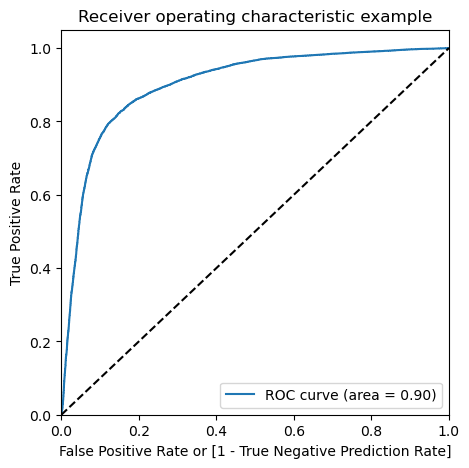

In [238]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

In [239]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.138574,0,1,1,0,0,0,0,0,0,0,0
1,0,0.401122,0,1,1,1,1,1,0,0,0,0,0
2,0,0.324276,0,1,1,1,1,0,0,0,0,0,0
3,0,0.414619,0,1,1,1,1,1,0,0,0,0,0
4,0,0.508730,1,1,1,1,1,1,1,0,0,0,0


In [240]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.686696     0.977603     0.395790
0.2          0.2  0.751996     0.957538     0.546454
0.3          0.3  0.791321     0.925653     0.656989
0.4          0.4  0.816881     0.891176     0.742586
0.5          0.5  0.834042     0.856128     0.811956
0.6          0.6  0.836116     0.805682     0.866549
0.7          0.7  0.820795     0.730350     0.911240
0.8          0.8  0.755003     0.561230     0.948776
0.9          0.9  0.614294     0.248185     0.980402


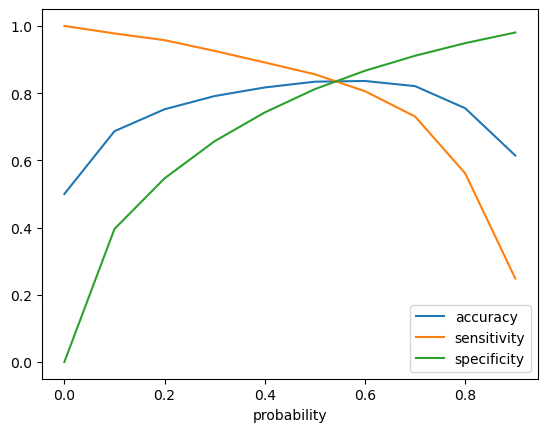

In [241]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

##### From the above PLOT LINE we can observe that the optimum point of Classification lies between 0.5 and 0.6(nearby 0.6).

In [242]:
#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.54 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_churn_pred
0,0,0.138574,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.401122,0,1,1,1,1,1,0,0,0,0,0,0
2,0,0.324276,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.414619,0,1,1,1,1,1,0,0,0,0,0,0
4,0,0.508730,1,1,1,1,1,1,1,0,0,0,0,0


In [243]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model now is: 0.8362453338863542


In [244]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[16127  3161]
 [ 3156 16132]]


In [245]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.8363749481542928
Specificity =  0.8361157196184156
False Positive Rate =  0.1638842803815844
Precision =  0.8361581920903954
True Negative Prediction Rate =  0.8363325208733081


#### Precision and recall tradeoff

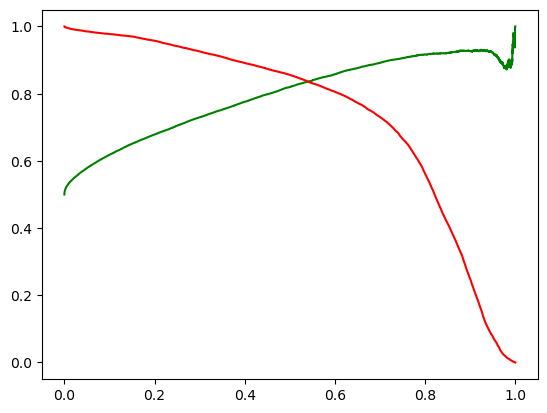

In [246]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [247]:
# Scaling the test data
X_test[column_num] = scaler.transform(X_test[column_num])
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
35865,0.026143,0.021027,0.000000,0.000070,0.003412,0.000575,0.000000,0.0,0.000000,0.000000,...,0,0,0,1,0,0,1,0,0,0
41952,0.048190,0.005702,0.005250,0.002058,0.011146,0.023873,0.007510,0.0,0.000000,0.000000,...,1,0,0,1,0,0,0,0,1,0
98938,0.061230,0.003275,0.037889,0.008157,0.010851,0.025458,0.018789,0.0,0.000000,0.000000,...,1,0,0,1,0,0,0,0,0,0
29459,0.042998,0.020180,0.000963,0.000297,0.001588,0.003828,0.000573,0.0,0.000000,0.000000,...,1,0,0,1,0,0,1,0,0,0
70682,0.098384,0.005699,0.011111,0.039505,0.084425,0.242612,0.135335,0.0,0.000721,0.000521,...,1,0,0,0,1,0,0,1,0,0


In [248]:
# Feature selection
X_test=X_test[rfe_columns_2]
X_test.head()

,arpu_8,roam_ic_mou_7,roam_og_mou_8,loc_og_t2m_mou_8,std_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_8,std_ic_mou_8,spl_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,monthly_2g_8,aug_vbc_3g,avg_arpu_6_7
35865,0.026143,0.000000,0.000000,0.000000,0.000000,0.000053,0.003321,0.002782,0.009587,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.059622
41952,0.048190,0.000000,0.000000,0.005379,0.018971,0.009067,0.023235,0.022029,0.008684,0.000000,0.020408,0.011238,0.017544,0.035705,0.004586,0.0,0.019572,0.075152
98938,0.061230,0.000000,0.000000,0.073716,0.000374,0.024987,0.057580,0.183375,0.003706,0.000000,0.035714,0.029220,0.035088,0.124107,0.056568,0.0,0.211621,0.095894
29459,0.042998,0.000000,0.000000,0.000000,0.000000,0.000800,0.001622,0.000037,0.011386,0.000000,0.025510,0.034615,0.052632,0.063039,0.008221,0.2,0.068735,0.070960
70682,0.098384,0.000721,0.031491,0.041749,0.172443,0.157573,0.021147,0.066205,0.002352,0.080257,0.061224,0.029220,0.017544,0.005664,0.000000,0.0,0.000000,0.101081


In [249]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

**Predicting the target variable**

In [250]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 35865    0.772260
41952    0.516558
98938    0.000325
29459    0.128443
70682    0.007754
58317    0.237200
4860     0.007990
16890    0.702931
61329    0.652452
94332    0.491091
dtype: float64


In [251]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
35865,0.772260
41952,0.516558
98938,0.000325
29459,0.128443
70682,0.007754


In [252]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [253]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
35865,0
41952,0
98938,0
29459,0
70682,0


In [254]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,churn,Conv_prob
35865,0,0.772260
41952,0,0.516558
98938,0,0.000325
29459,0,0.128443
70682,0,0.007754


In [255]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

,churn,Conv_prob,test_churn_pred
35865,0,0.772260,1
41952,0,0.516558,0
98938,0,0.000325,0
29459,0,0.128443,0
70682,0,0.007754,0


In [256]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)

0.8270192200866571

In [257]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[6860 1412]
 [ 145  584]]


In [258]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [259]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.8010973936899863
Specificity =  0.8293036750483559
False Positive Rate =  0.1706963249516441
Precision =  0.2925851703406814
True Negative Prediction Rate =  0.979300499643112


In [260]:
print("The accuracy of the predicted model is: ",round(metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred),2)*100,"%")
print("The sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")

print("\nAs the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n") 

The accuracy of the predicted model is:  83.0 %
The sensitivity of the predicted model is:  80.0 %

As the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer



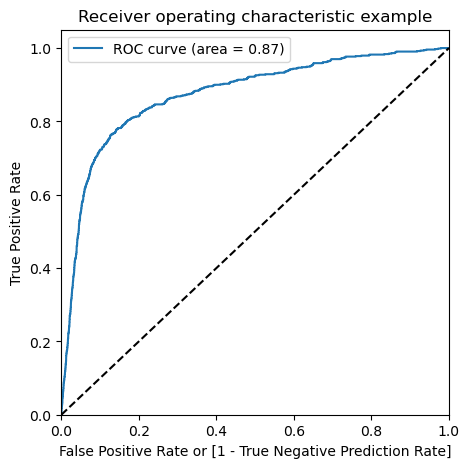

In [261]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn,y_pred_final.Conv_prob)

#### Logistic Regression using PCA

In [262]:
# split the dataset into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

# apply scaling on the dataset

scaler = MinMaxScaler()
X_train[column_num] = scaler.fit_transform(X_train[column_num])
X_test[column_num] = scaler.transform(X_test[column_num])

# Applying SMOTE technique for data imbalance correction

sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

X_train_sm.head()

Dimension of X_train: (21000, 126)
Dimension of X_test: (9001, 126)
Dimension of X_train_sm Shape: (38576, 126)
Dimension of y_train_sm Shape: (38576,)


,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,0.038904,0.000235,0.000531,0.000238,0.004211,0.003651,0.004095,0.0,0.000000,0.0,...,1,0,0,1,0,0,0,0,0,0
1,0.032921,0.000493,0.000000,0.000000,0.001631,0.000000,0.000000,0.0,0.000000,0.0,...,1,0,0,1,0,0,0,0,1,0
2,0.033826,0.000876,0.000275,0.000714,0.003861,0.007485,0.003679,0.0,0.000000,0.0,...,1,0,0,0,1,0,1,0,0,0
3,0.081645,0.163879,0.105394,0.050406,0.142667,0.177782,0.052962,0.0,0.029033,0.0,...,1,0,0,1,0,0,0,0,1,0
4,0.042893,0.079633,0.051881,0.004868,0.058346,0.046732,0.010097,0.0,0.000000,0.0,...,0,0,0,0,1,0,0,1,0,0


In [263]:
# importing PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

# applying PCA on train data
pca.fit(X_train_sm)

PCA(random_state=42)

In [264]:
X_train_sm_pca=pca.fit_transform(X_train_sm)
print("Dimension of X_train_sm_pca: ",X_train_sm_pca.shape)

X_test_pca=pca.transform(X_test)
print("Dimension of X_test_pca: ",X_test_pca.shape)

Dimension of X_train_sm_pca:  (38576, 126)
Dimension of X_test_pca:  (9001, 126)


In [265]:
#Viewing the PCA components
pca.components_

array([[ 1.77080250e-02,  5.62945551e-03,  1.28071557e-02, ...,
        -8.33377373e-02,  2.03169293e-01, -2.25884463e-04],
       [ 1.17884332e-03,  1.36226801e-04,  2.66567649e-03, ...,
         6.62002105e-01, -7.17541378e-01,  1.93966990e-04],
       [ 8.31908962e-03, -2.32698646e-02, -1.53378013e-02, ...,
         7.54642802e-02,  5.50287343e-02,  1.26734621e-03],
       ...,
       [-3.94307291e-07,  1.32661563e-06, -2.21287989e-06, ...,
        -3.76725866e-08, -1.42403278e-08,  2.74517957e-08],
       [ 2.29473384e-07, -1.88640723e-06,  1.53383133e-06, ...,
        -3.64244932e-08, -2.71775061e-08, -3.24942342e-08],
       [-0.00000000e+00,  9.15847248e-16, -8.10568734e-17, ...,
         4.98183097e-18, -1.72387817e-18,  2.71033762e-18]])

#### Performing Logistic Regression

In [266]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_sm_pca, y_train_sm)

# making the predictions
y_pred = logreg_pca.predict(X_test_pca)

# converting the prediction into a dataframe
y_pred_df = pd.DataFrame(y_pred)
print("Dimension of y_pred_df:", y_pred_df.shape)

Dimension of y_pred_df: (9001, 1)


In [267]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

Confusion Matirx for y_test & y_pred
 [[6760 1512]
 [ 127  602]] 

Accuracy of the logistic regression model with PCA:  0.8179091212087546


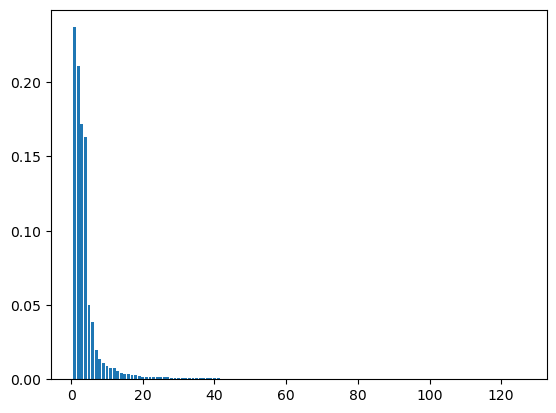

In [268]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.show()

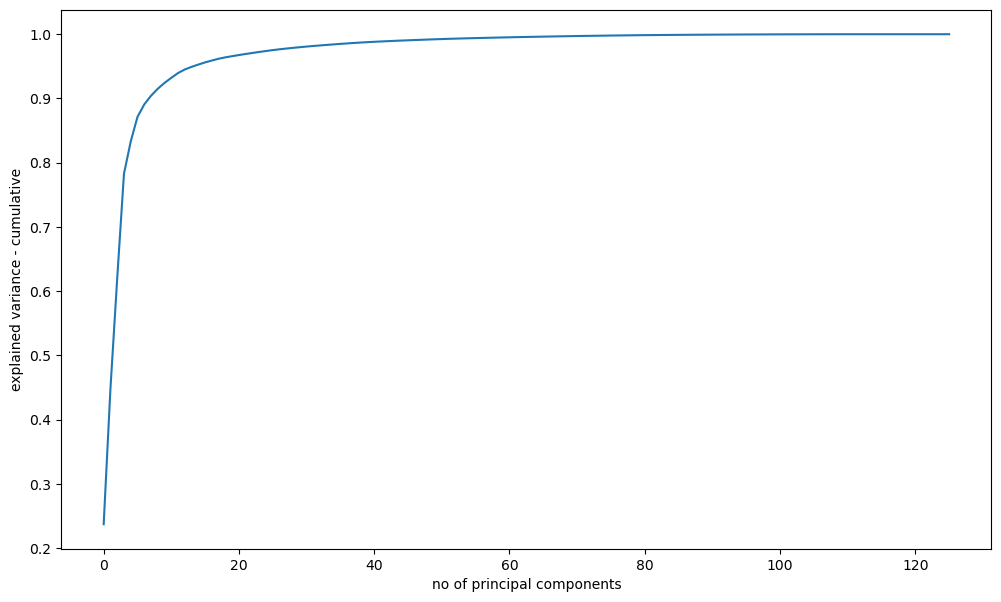

In [269]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# Making a scree plot
fig = plt.figure(figsize=[12,7])
plt.plot(var_cumu)
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

In [270]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

array([23.7, 44.8, 62. , 78.3, 83.3, 87.1, 89. , 90.4, 91.5, 92.4, 93.2,
       93.9, 94.5, 94.9, 95.3, 95.6, 95.9, 96.2, 96.4, 96.6, 96.8, 97. ,
       97.2, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9, 98. , 98.1, 98.2, 98.3,
       98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. , 99.1, 99.2, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3])

**Fitting the dataset with the 8 explainable components**

In [271]:
pca_8 = PCA(n_components=15)

train_pca_8 = pca_8.fit_transform(X_train_sm)
print("Dimension for Train dataset using PCA: ", train_pca_8.shape)

test_pca_8 = pca_8.transform(X_test)
print("Dimension for Test dataset using PCA: ", test_pca_8.shape)

Dimension for Train dataset using PCA:  (38576, 15)
Dimension for Test dataset using PCA:  (9001, 15)


In [272]:
logreg_pca_8 = LogisticRegression()
logreg_pca_8.fit(train_pca_8, y_train_sm)

# making the predictions
y_pred_8 = logreg_pca_8.predict(test_pca_8)

# converting the prediction into a dataframe
y_pred_df_8 = pd.DataFrame(y_pred_8)
print("Dimension of y_pred_df_8: ", y_pred_df_8.shape)

Dimension of y_pred_df_8:  (9001, 1)


In [273]:
logreg_pca_8 = LogisticRegression()
logreg_pca_8.fit(train_pca_8, y_train_sm)

# making the predictions
y_pred_8 = logreg_pca_8.predict(test_pca_8)

# converting the prediction into a dataframe
y_pred_df_8 = pd.DataFrame(y_pred_8)
print("Dimension of y_pred_df_8: ", y_pred_df_8.shape)

Dimension of y_pred_df_8:  (9001, 1)


In [274]:
# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred_8),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred_8))

Confusion Matirx for y_test & y_pred
 [[6249 2023]
 [ 184  545]] 

Accuracy of the logistic regression model with PCA:  0.7548050216642596
